This is a programming problem for elementary school students in Vietnam, my home country. A Google engineer discovered that this is among the hardest interview problems at Google. I may have encountered similar problem during my education in Vietnam, so I am tempted to solve this problem and revisit my memory lane. 

When I found this problem in 2013, I did not have much programming experience so I was totally confused. Now that I am more comfortable with programming, I can solve this problem in an intuitive manner.

In [152]:
'''
The fish tank problem: determine the maximum area in a fish tank that contains many separating walls
https://neil.fraser.name/news/2013/03/16/
'''
f = open("data.txt")
data = f.readlines()
f.close()
data[0]
data

['1000000010001000100000001\n',
 '0100000100010100010000010\n',
 '0010001000100010001000100\n',
 '0001010001000001000101000\n',
 '1000100010001000100010000\n',
 '0100000100010001010001000\n',
 '0010001000100010001000100\n',
 '0001010001000100000100010\n',
 '0000100010001000000010001\n',
 '0001000101000100000101000\n',
 '0010001000100010001000100\n',
 '0100010000010001010000010\n',
 '1000100010001000100010001\n',
 '0100000101000001000100010\n',
 '0010001000100010001000100\n',
 '0001010000010100010001000\n',
 '0000100000001000100010000\n']

In [153]:
data = [list(line)[:-1] for line in data]
print(data[0])
print(len(data[0]))

['1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1']
25


In [216]:
colorDf = [[-1 for i in row] for row in data]
print(len(colorDf), len(data))
print(len(colorDf[0]), len(data[0]))

17 17
25 25


In [217]:
DictColorsArea = {}
DictColorsMap = {}
startColor = -1
selectColor = -1

MAXROW = len(data)
MAXCOL = len(data[0])

def AdjacentCells(i, j):
    candidates = [(i-1, j),
                 (i, j+1),
                 (i+1, j),
                 (i, j-1)]
    return [(x, y) for (x,y) in candidates if x >= 0 and x < MAXROW and y >= 0 and y < MAXCOL and data[x][y] == '0']

def TackleNeighborcolors(neighborColors):
    minColor = min(neighborColors)
    for color in neighborColors:
        # The following line is actually very important
        # it helps reconcile the neighborhood's color
        DictColorsMap[DictColorsMap[color]] = DictColorsMap[minColor]
        DictColorsMap[color] = DictColorsMap[minColor]

for thisRow in range(len(data)):
    for thisCol in range(len(data[0])):
        if data[thisRow][thisCol] == '0':
            neighbors = AdjacentCells(thisRow, thisCol)
            neighborColors = set()
            for cell in neighbors:
                if colorDf[cell[0]][cell[1]] != -1:
                    neighborColors.add(colorDf[cell[0]][cell[1]])
            
            if colorDf[thisRow][thisCol] == -1:
                # Select a color from neighbors
                if len(neighborColors) == 0:
                    selectColor = -1
                else:
                    selectColor = min(neighborColors)
                
                if selectColor == -1:
                    # add a new color
                    startColor += 1
                    colorDf[thisRow][thisCol] = startColor
                    DictColorsArea[startColor] = 1
                    
                    DictColorsMap[startColor] = startColor
                else:
                    colorDf[thisRow][thisCol] = selectColor
                    DictColorsArea[selectColor] += 1
                    
                    TackleNeighborcolors(neighborColors)

for row in colorDf:
    print(row)

[-1, 0, 0, 0, 0, 0, 0, 0, -1, 1, 1, 1, -1, 2, 2, 2, -1, 3, 3, 3, 3, 3, 3, 3, -1]
[4, -1, 0, 0, 0, 0, 0, -1, 5, 1, 1, -1, 6, -1, 2, 2, 2, -1, 3, 3, 3, 3, 3, -1, 7]
[4, 4, -1, 0, 0, 0, -1, 8, 5, 1, -1, 9, 6, 6, -1, 2, 2, 2, -1, 3, 3, 3, -1, 10, 7]
[4, 4, 4, -1, 0, -1, 11, 8, 5, -1, 12, 9, 6, 6, 6, -1, 2, 2, 2, -1, 3, -1, 13, 10, 7]
[-1, 4, 4, 4, -1, 14, 11, 8, -1, 15, 12, 9, -1, 6, 6, 6, -1, 2, 2, 2, -1, 16, 13, 10, 7]
[17, -1, 4, 4, 4, 4, 4, -1, 18, 15, 12, -1, 19, 6, 6, -1, 20, -1, 2, 2, 2, -1, 13, 10, 7]
[17, 17, -1, 4, 4, 4, -1, 21, 18, 15, -1, 22, 19, 6, -1, 23, 20, 20, -1, 2, 2, 2, -1, 10, 7]
[17, 17, 17, -1, 4, -1, 24, 21, 18, -1, 25, 22, 19, -1, 26, 23, 20, 20, 20, -1, 2, 2, 2, -1, 7]
[17, 17, 17, 17, -1, 27, 24, 21, -1, 28, 25, 22, -1, 29, 26, 23, 20, 20, 20, 20, -1, 2, 2, 2, -1]
[17, 17, 17, -1, 30, 27, 24, -1, 31, -1, 25, 22, 22, -1, 26, 23, 20, 20, 20, -1, 32, -1, 2, 2, 2]
[17, 17, -1, 33, 30, 27, -1, 34, 31, 31, -1, 22, 22, 22, -1, 23, 20, 20, -1, 35, 32, 32, -1, 2, 2]
[17, 

There are too many colors. We need to map these colors back to just a few of them. Luckily, we have prepared a dictionary to map between colors:

In [218]:
DictColorsMap

{0: 0,
 1: 4,
 2: 2,
 3: 3,
 4: 4,
 5: 1,
 6: 6,
 7: 7,
 8: 1,
 9: 6,
 10: 7,
 11: 4,
 12: 6,
 13: 7,
 14: 4,
 15: 6,
 16: 7,
 17: 17,
 18: 6,
 19: 6,
 20: 20,
 21: 6,
 22: 6,
 23: 20,
 24: 6,
 25: 6,
 26: 20,
 27: 6,
 28: 6,
 29: 20,
 30: 6,
 31: 6,
 32: 32,
 33: 6,
 34: 31,
 35: 32,
 36: 6,
 37: 6,
 38: 32,
 39: 6,
 40: 6,
 41: 32,
 42: 42,
 43: 43,
 44: 32,
 45: 32,
 46: 46,
 47: 43,
 48: 32,
 49: 32,
 50: 46,
 51: 43,
 52: 32,
 53: 32,
 54: 46,
 55: 43,
 56: 32,
 57: 32,
 58: 46}

We can see that 34 maps to 31 maps to 6 while we want 34 maps to 6 directly.

In [219]:
# Remove all indirect mappings
for key in DictColorsMap.keys():
    finalMap = key
    mapList = [finalMap]
    
    while finalMap != DictColorsMap[finalMap]:
        mapList.append(DictColorsMap[finalMap])
        finalMap = DictColorsMap[finalMap]
    
    for thisColor in mapList:
        DictColorsMap[thisColor] = finalMap

DictColorsMap

{0: 0,
 1: 4,
 2: 2,
 3: 3,
 4: 4,
 5: 4,
 6: 6,
 7: 7,
 8: 4,
 9: 6,
 10: 7,
 11: 4,
 12: 6,
 13: 7,
 14: 4,
 15: 6,
 16: 7,
 17: 17,
 18: 6,
 19: 6,
 20: 20,
 21: 6,
 22: 6,
 23: 20,
 24: 6,
 25: 6,
 26: 20,
 27: 6,
 28: 6,
 29: 20,
 30: 6,
 31: 6,
 32: 32,
 33: 6,
 34: 6,
 35: 32,
 36: 6,
 37: 6,
 38: 32,
 39: 6,
 40: 6,
 41: 32,
 42: 42,
 43: 43,
 44: 32,
 45: 32,
 46: 46,
 47: 43,
 48: 32,
 49: 32,
 50: 46,
 51: 43,
 52: 32,
 53: 32,
 54: 46,
 55: 43,
 56: 32,
 57: 32,
 58: 46}

In [220]:
for thisRow in range(len(colorDf)):
    for thisCol in range(len(colorDf[0])):
        if data[thisRow][thisCol] == '0':
            currentColor = colorDf[thisRow][thisCol]
            colorDf[thisRow][thisCol] = DictColorsMap[currentColor]
            
for row in colorDf:
    print(row)

[-1, 0, 0, 0, 0, 0, 0, 0, -1, 4, 4, 4, -1, 2, 2, 2, -1, 3, 3, 3, 3, 3, 3, 3, -1]
[4, -1, 0, 0, 0, 0, 0, -1, 4, 4, 4, -1, 6, -1, 2, 2, 2, -1, 3, 3, 3, 3, 3, -1, 7]
[4, 4, -1, 0, 0, 0, -1, 4, 4, 4, -1, 6, 6, 6, -1, 2, 2, 2, -1, 3, 3, 3, -1, 7, 7]
[4, 4, 4, -1, 0, -1, 4, 4, 4, -1, 6, 6, 6, 6, 6, -1, 2, 2, 2, -1, 3, -1, 7, 7, 7]
[-1, 4, 4, 4, -1, 4, 4, 4, -1, 6, 6, 6, -1, 6, 6, 6, -1, 2, 2, 2, -1, 7, 7, 7, 7]
[17, -1, 4, 4, 4, 4, 4, -1, 6, 6, 6, -1, 6, 6, 6, -1, 20, -1, 2, 2, 2, -1, 7, 7, 7]
[17, 17, -1, 4, 4, 4, -1, 6, 6, 6, -1, 6, 6, 6, -1, 20, 20, 20, -1, 2, 2, 2, -1, 7, 7]
[17, 17, 17, -1, 4, -1, 6, 6, 6, -1, 6, 6, 6, -1, 20, 20, 20, 20, 20, -1, 2, 2, 2, -1, 7]
[17, 17, 17, 17, -1, 6, 6, 6, -1, 6, 6, 6, -1, 20, 20, 20, 20, 20, 20, 20, -1, 2, 2, 2, -1]
[17, 17, 17, -1, 6, 6, 6, -1, 6, -1, 6, 6, 6, -1, 20, 20, 20, 20, 20, -1, 32, -1, 2, 2, 2]
[17, 17, -1, 6, 6, 6, -1, 6, 6, 6, -1, 6, 6, 6, -1, 20, 20, 20, -1, 32, 32, 32, -1, 2, 2]
[17, -1, 6, 6, 6, -1, 6, 6, 6, 6, 6, -1, 6, 6, 6, -1, 20,

In [221]:
# Area mapping
for thisColor in DictColorsArea.keys():
    color_map_to = DictColorsMap[thisColor]
    if color_map_to != thisColor:
        DictColorsArea[color_map_to] += DictColorsArea[thisColor]
        DictColorsArea[thisColor] = 0

DictColorsArea = { key: DictColorsArea[key] for key in DictColorsArea.keys() if DictColorsArea[key] > 0}
DictColorsArea

{0: 16,
 2: 33,
 3: 16,
 4: 33,
 6: 96,
 7: 16,
 17: 16,
 20: 25,
 32: 39,
 42: 10,
 43: 16,
 46: 10}

In [222]:
# Which one has the highest area?
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
s = [(k, DictColorsArea[k]) for k in sorted(DictColorsArea, key=DictColorsArea.get, reverse=True)]
s

[(6, 96),
 (32, 39),
 (2, 33),
 (4, 33),
 (20, 25),
 (0, 16),
 (3, 16),
 (7, 16),
 (43, 16),
 (17, 16),
 (42, 10),
 (46, 10)]

Now let's see if we can visualize this fish tank.

In [238]:
MAXCOLOR = 1 + len(DictColorsArea.keys())

# Add some randomness to help add some difference to the color palettes
availableRange = range(1, 1 + len(DictColorsArea.keys()))
newColorMaps = dict(zip(DictColorsArea.keys()
                        ,np.random.permutation(availableRange)))

colorDf_viz = [[MAXCOLOR for i in row] for row in data]

for thisRow in range(len(colorDf)):
    for thisCol in range(len(colorDf[0])):
        if data[thisRow][thisCol] == '0':
            currentColor = colorDf[thisRow][thisCol]
            colorDf_viz[thisRow][thisCol] = newColorMaps[DictColorsMap[currentColor]]

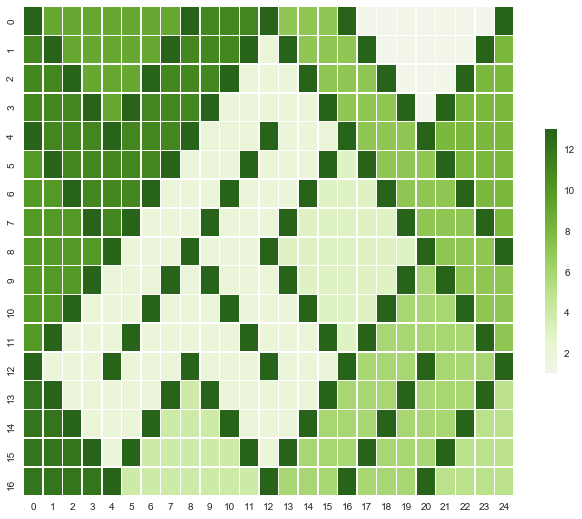

In [239]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
%matplotlib inline

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

dataViz = np.array(colorDf_viz)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(256, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dataViz, cmap= "PiYG",
            vmax= MAXCOLOR, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})